In [47]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
spam=pd.read_csv('spam.csv')

In [10]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
#function to clean the message column
def clean_text(text):
    cleaned= re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned

In [14]:
spam['Message_cleaned']=spam['Message'].apply(clean_text)

In [16]:
def clean_text_improved(text):
    #remove special characters
    text= re.sub(r'[^a-zA-Z0-9\s]','',text)
    #step 3 strip whitespaces
    text= text.strip()
    #step 4 lower case for character consistency
    text= text.lower()
    return text
    

In [17]:
spam['message_clean']=spam['Message'].apply(clean_text_improved)

In [18]:
spam

,Category,Message,Message_cleaned,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,Will b going to esplanade fr home,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,the guy did some bitching but i acted like id ...


In [21]:
cols_to_drop=['Message', 'Message_cleaned']

In [26]:
spam=spam.drop(columns=cols_to_drop)

In [27]:
spam

,Category,message_clean
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


In [30]:
vectorizer= CountVectorizer(
    lowercase=True,
    stop_words='english'
)

In [31]:
X= vectorizer.fit_transform(spam['message_clean'])

In [32]:
print('voccalbulary words kept out')
print(vectorizer.get_feature_names_out())

voccalbulary words kept out
['008704050406' '0089my' '0121' ... 'zoom' 'zouk' 'zyada']


In [38]:
encoder=LabelEncoder()

In [39]:
spam['status']=encoder.fit_transform(spam['Category'])

In [43]:
#spam message= 1, not spam= 0
spam.drop(columns=['Category'],inplace=True)
spam

,message_clean,status
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i dont think he goes to usf he lives aroun...,0
...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1
5568,will b going to esplanade fr home,0
5569,pity was in mood for that soany other suggest...,0
5570,the guy did some bitching but i acted like id ...,0


In [44]:
#training the model now

In [53]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


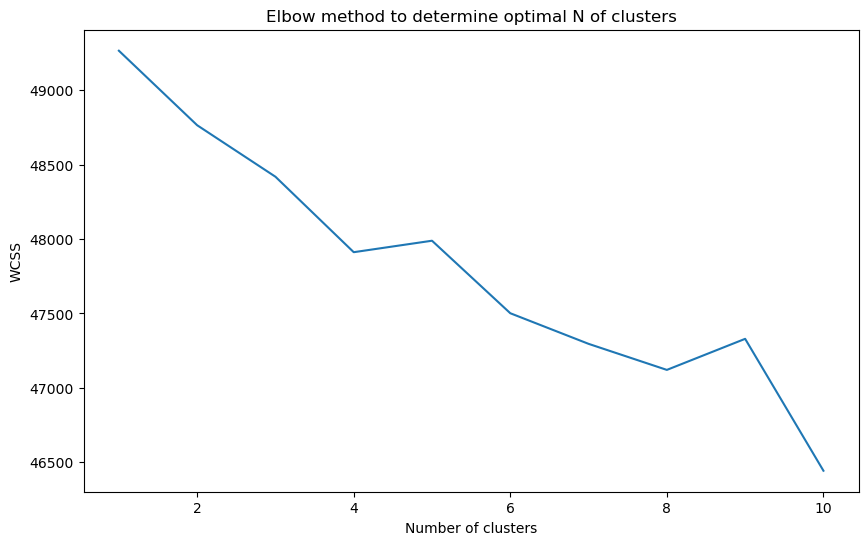

In [54]:
#we will now identify elbow point

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [55]:
kmeans=KMeans(n_clusters=8, init='k-means++', max_iter=300,n_init=10,random_state=0)
y_kmeans= kmeans.fit_predict(X)

In [56]:
spam['cluster']=y_kmeans

In [57]:
spam

,message_clean,status,cluster
0,go until jurong point crazy available only in ...,0,3
1,ok lar joking wif u oni,0,3
2,free entry in 2 a wkly comp to win fa cup fina...,1,2
3,u dun say so early hor u c already then say,0,3
4,nah i dont think he goes to usf he lives aroun...,0,7
...,...,...,...
5567,this is the 2nd time we have tried 2 contact u...,1,5
5568,will b going to esplanade fr home,0,3
5569,pity was in mood for that soany other suggest...,0,3
5570,the guy did some bitching but i acted like id ...,0,3


In [58]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')
centers =kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('message')
plt.ylabel('Status')
plt.show()

AttributeError: 'csr_matrix' object has no attribute 'iloc'

<Figure size 1000x600 with 0 Axes>

In [ ]:
this model is a complete trash i realized i used a wrong set of data but i learnt a ton by the way